In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

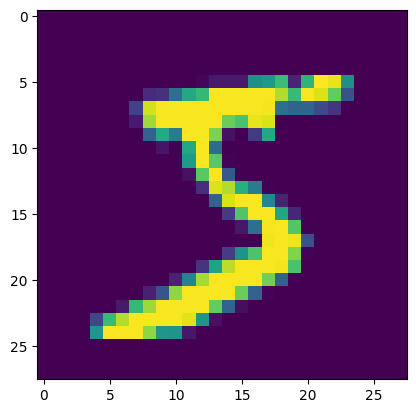

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [9]:
784/2

392.0

In [10]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

2023-06-10 10:02:45.267338: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2023-06-10 10:02:45.273565: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2400000000 Hz
2023-06-10 10:02:45.273758: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4293dd0 executing computations on platform Host. Devices:
2023-06-10 10:02:45.273774: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [11]:
25/784

0.03188775510204082

In [12]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))

decoder.add(Reshape([28,28]))

In [13]:
autoencoder = Sequential([encoder,decoder])

In [14]:
autoencoder.compile(loss='binary_crossentropy',
                   optimizer=SGD(lr=1.5),
                   metrics=['accuracy'])

In [15]:
autoencoder.fit(X_train,X_train,epochs=5,validation_data=[X_test,X_test])

2023-06-10 10:07:26.390721: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 376320000 exceeds 10% of system memory.
2023-06-10 10:07:26.641319: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 376320000 exceeds 10% of system memory.
2023-06-10 10:07:27.041821: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 62720000 exceeds 10% of system memory.
2023-06-10 10:07:27.075286: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 62720000 exceeds 10% of system memory.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 274us/sample - loss: 0.2547 - accuracy: 0.7918 - val_loss: 0.2201 - val_accuracy: 0.7908
Epoch 2/5
60000/60000 [==============================] - 14s 230us/sample - loss: 0.1968 - accuracy: 0.7966 - val_loss: 0.1725 - val_accuracy: 0.7991
Epoch 3/5
60000/60000 [==============================] - 14s 227us/sample - loss: 0.1647 - accuracy: 0.8013 - val_loss: 0.1586 - val_accuracy: 0.7992
Epoch 4/5
60000/60000 [==============================] - 13s 210us/sample - loss: 0.1529 - accuracy: 0.8031 - val_loss: 0.1456 - val_accuracy: 0.8032
Epoch 5/5
60000/60000 [==============================] - 13s 212us/sample - loss: 0.1449 - accuracy: 0.8047 - val_loss: 0.1430 - val_accuracy: 0.8061


In [16]:
passed_images = autoencoder.predict(X_test[:10])

Original Image


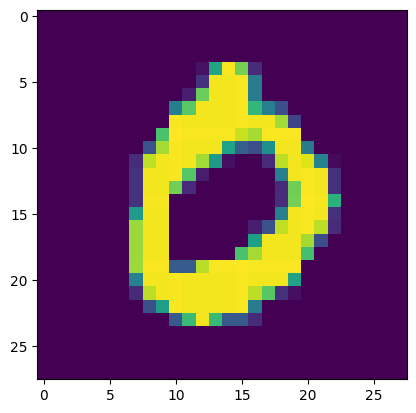

Attempted Reconstruction (after autoencoder)


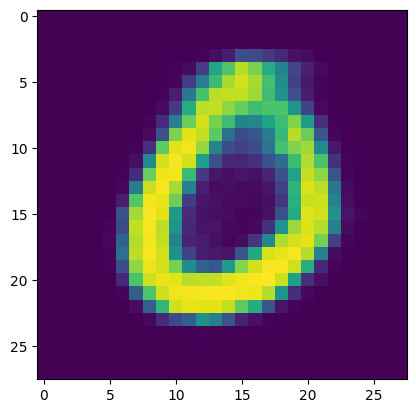

In [21]:
n = 3
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Attempted Reconstruction (after autoencoder)")
plt.imshow(passed_images[n])

# Noise Removal

In [22]:
from tensorflow.keras.layers import GaussianNoise

In [23]:
sample = GaussianNoise(0.2)

In [24]:
noisey = sample(X_test[:10],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Original Image


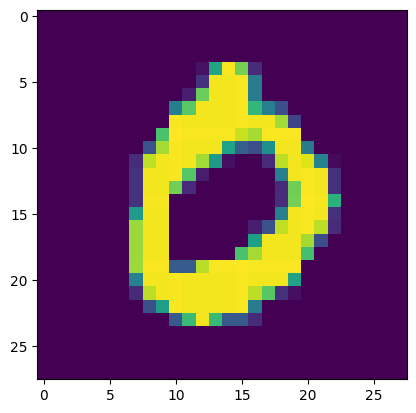

Noisey image


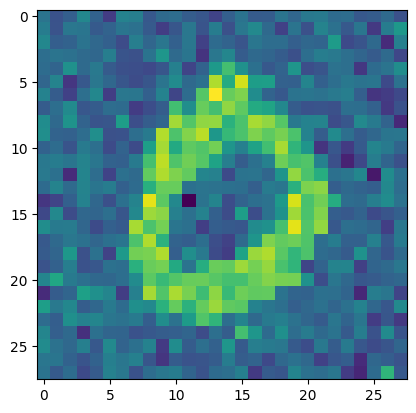

In [25]:
n = 3
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Noisey image")
plt.imshow(noisey[n])
plt.show()

In [26]:
import tensorflow as tf

In [27]:
tf.random.set_seed(101)
np.random.seed(101)
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [28]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))

decoder.add(Reshape([28,28]))

In [29]:
noise_remover = Sequential([encoder,decoder])

In [30]:
noise_remover.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

In [31]:
noise_remover.fit(X_train,X_train,epochs=8)

2023-06-10 10:20:24.767745: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 376320000 exceeds 10% of system memory.


Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 18s 307us/sample - loss: 0.1721 - accuracy: 0.8009
Epoch 2/8
60000/60000 [==============================] - 16s 259us/sample - loss: 0.1307 - accuracy: 0.8078
Epoch 3/8
60000/60000 [==============================] - 18s 306us/sample - loss: 0.1226 - accuracy: 0.8092
Epoch 4/8
60000/60000 [==============================] - 17s 280us/sample - loss: 0.1169 - accuracy: 0.8102
Epoch 5/8
60000/60000 [==============================] - 19s 321us/sample - loss: 0.1135 - accuracy: 0.8108
Epoch 6/8
60000/60000 [==============================] - 19s 317us/sample - loss: 0.1108 - accuracy: 0.8112
Epoch 7/8
60000/60000 [==============================] - 19s 313us/sample - loss: 0.1087 - accuracy: 0.8115
Epoch 8/8
60000/60000 [==============================] - 19s 315us/sample - loss: 0.1072 - accuracy: 0.8118


In [32]:
ten_noisey_images = sample(X_test[:10],training=True)

In [33]:
denoised = noise_remover(ten_noisey_images)

Original Image


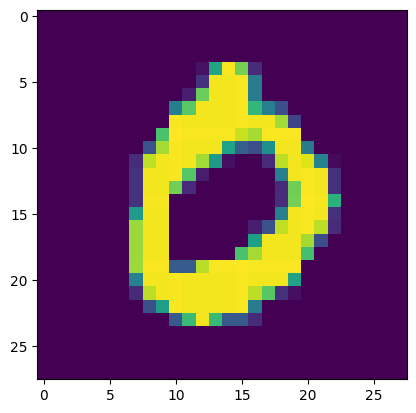

Noisey image


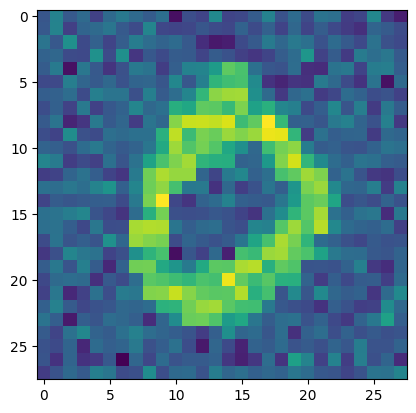

Noise removed image


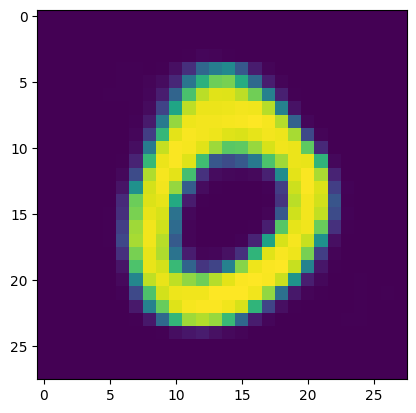

In [34]:
n = 3
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Noisey image")
plt.imshow(ten_noisey_images[n])
plt.show()
print("Noise removed image")
plt.imshow(denoised[n])
plt.show()